In [1]:
#Imports
import pandas as pd
import numpy as np
import acquire as a
import unicodedata
import re
import json
import time
import requests
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import os

from requests import get
from bs4 import BeautifulSoup

# Visual 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


import prepare as p



In [2]:
url = 'https://github.com/search?o=desc&p=1&q=shoes&s=stars&type=Repositories'
response = get(url)
response

<Response [429]>

<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="default-src 'none'; base-uri 'self'; connect-src 'self'; form-action 'self'; img-src 'self' data:; script-src 'self'; style-src 'unsafe-inline'" http-equiv="Content-Security-Policy"/>
<meta content="origin" name="referrer"/>
<title>Rate limit · GitHub</title>
<meta content="width=device-width" name="viewport"/>
<style media="screen" type="text/css">
      body {
        background-color: #f6f8fa;
        color: #24292e;
        font-family: -apple-system,BlinkMacSystemFont,Segoe UI,Helvetica,Arial,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol;
        font-size: 14px;
        line-height: 1.5;
        margin: 0;
      }

      .container { margin: 50px auto; max-width: 600px; text-align: center; padding: 0 24px; }

      a { color: #0366d6; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { line-height: 60px; font-size: 48px; f
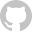
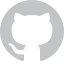

In [3]:
# BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
soup

In [4]:
pageCount = 15
urlsList = []
url = "https://github.com/search?o=desc&p={}&q=shoes&s=stars&type=Repositories" #curly braces lets you format
    
for x in range(pageCount)[1:]:
    urlsList.append(url.format(x))

In [5]:
#for url in urlsList:
    
    #response = get(url)
    #time.sleep(10)
    #print(response)

In [6]:
df = a.get_readme_data()

In [7]:
df = pd.DataFrame(df)

In [8]:
df

,repo,language,readme_contents
0,shoes/shoes4,Ruby,# Shoes 4 [![Linux Build Status](https://secur...
1,druv5319/Sneaks-API,JavaScript,"\n<p align=""center"">\n \n<img src=""https://gi..."
2,shoes/shoes3,C,\n ((( |||_| ///\ [[[_ ...
3,WebAR-rocks/WebAR.rocks.hand,JavaScript,# JavaScript/WebGL lightweight and robust hand...
4,brandontruggles/Selenium-Shoe-Bot-NakedCPH,Python,# Selenium Shoe Bot (DEPRECATED!)\n\n**This pr...
...,...,...,...
93,Kvas1407/ecomm-store-project,HTML,# Web Design & Development 1\n## E-Comm Websto...
94,bisofts/kingshoes,None,# kingshoes.-test.github.io
95,yug20/react-gltf-models-shoes,JavaScript,![Screenshot from 2022-12-26 18-19-57](https:/...
96,Kenzothd/Shoedog_Client,TypeScript,# Getting Started with Create React App\n\nThi...


In [ ]:
df = pd.DataFrame(readme_data)
df.head()

In [ ]:
# Clean readme_contents column and create new column
df['cleaned'] = df['readme_contents'].apply(p.clean_text)

In [ ]:
df.head()

In [ ]:
df.language.isna().sum()

In [ ]:
df.isna().sum()

In [ ]:
# Drop Nulls
df = df.dropna()

In [ ]:
# Language Value counts
df.language.value_counts()

In [ ]:
#returning all the words in readme_contents individually
readme_words = clean_text(' ’.join(df[‘readme_contents’]))
# setting the cleaned txt to Series and counting word frequency
count = pd.Series(readme_words).value_counts()
count

In [ ]:
other_langs = ['Java','Dart','SCSS','PHP','Go','C++','Smarty','C','Jupyter Notebook','AppleScript',
              'Vue']

In [ ]:
for lang in other_langs:
    
    df['language'] = df.language.replace(lang,'other')

In [ ]:
df.language.value_counts()

In [ ]:
def get_readme_data():
    
    '''
    Scrapes a variety of news articles. Must create a topic_list variable that contains the 
    category of the news article. Example: ['business','technology','sports']
    '''

    # Check if JSON file exists
    file = 'readme_data.json'
    
    if os.path.exists(file):
        
        with open(file) as f:
            
            return json.load(f)
    
    
    readme_data = scrape_github_data()
    
    
    # Save into JSON
    with open(file, 'w') as f:
        
        json.dump(readme_data, f)
    
    
    return readme_data

In [ ]:
get_readme_data()